In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [4]:
df=pd.read_csv(r"C:\Users\Tushar\Downloads\train_hr.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
df.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
df['education'].fillna(df['education'].mode()[0], inplace=True)


In [21]:
df['previous_year_rating'] = pd.to_numeric(df['previous_year_rating'], errors='coerce')
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())


In [22]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [24]:
columns_object = []

for i in df.columns:
    if df[i].dtype == 'object':
       columns_object.append(i)

columns_object

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [27]:
le=LabelEncoder()
 
for x in columns_object:
    df[x]=le.fit_transform(df[x])

In [28]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
5,58896,0,11,0,1,2,2,31,3.0,7,0,0,85,0
6,20379,4,12,0,0,0,1,31,3.0,5,0,0,59,0
7,16290,4,27,2,1,2,1,33,3.0,6,0,0,63,0
8,73202,0,12,0,1,0,1,28,4.0,5,0,0,83,0
9,28911,7,0,2,1,2,1,32,5.0,5,1,0,54,0


In [29]:
X = df.drop(['employee_id', 'is_promoted'], axis=1)
y = df['is_promoted']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 🔹 Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Results
Accuracy: 0.9178069695311074
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10028
           1       0.65      0.08      0.14       934

    accuracy                           0.92     10962
   macro avg       0.78      0.54      0.55     10962
weighted avg       0.90      0.92      0.89     10962



### 🔹 KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("🔹 KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


🔹 KNN Results
Accuracy: 0.9149790184272943
              precision    recall  f1-score   support

           0       0.93      0.99      0.95     10028
           1       0.50      0.15      0.23       934

    accuracy                           0.91     10962
   macro avg       0.71      0.57      0.59     10962
weighted avg       0.89      0.91      0.89     10962



### 🔹 Decision Tree

In [52]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree Results
Accuracy: 0.8885239919722678
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10028
           1       0.37      0.44      0.40       934

    accuracy                           0.89     10962
   macro avg       0.66      0.69      0.67     10962
weighted avg       0.90      0.89      0.89     10962



### 🔹 Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 0.9343185550082101
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10028
           1       0.84      0.28      0.42       934

    accuracy                           0.93     10962
   macro avg       0.89      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962



### 🔹 Support Vector Classifier

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM Results
Accuracy: 0.922824302134647
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10028
           1       0.89      0.11      0.19       934

    accuracy                           0.92     10962
   macro avg       0.90      0.55      0.58     10962
weighted avg       0.92      0.92      0.89     10962



### 🔹 XGBoost Classifier

In [41]:
xgb = XGBClassifier(
    eval_metric='logloss',      # tells XGBoost how to measure error
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("🔹 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Results
Accuracy: 0.9422550629447182
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.90      0.36      0.52       934

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [43]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Calculate and store accuracies
accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}


accuracy_results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)


# Convert to DataFrame
results_df = pd.DataFrame(list(accuracy_results.items()), columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\n🏆 Model Accuracy Comparison:")
print(results_df)



🏆 Model Accuracy Comparison:
                 Model  Accuracy
5              XGBoost  0.942255
3        Random Forest  0.934319
4                  SVM  0.922824
0  Logistic Regression  0.917807
1                  KNN  0.914979
2        Decision Tree  0.888524


### 🔹 XGBoost Tuning

In [56]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
print("🔹 XGBoost Tuned Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Best Params:", grid_xgb.best_params_)

🔹 XGBoost Tuned Accuracy: 0.943258529465426
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


### 🔹 Random Forest Tuning

In [48]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("🔹 Random Forest Tuned Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Best Params:", grid_rf.best_params_)

🔹 Random Forest Tuned Accuracy: 0.9373289545703338
Best Params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [58]:
# Store accuracies of tuned models
tuned_results = {
    "XGBoost (Tuned)": accuracy_score(y_test, y_pred_xgb_tuned),
    "Random Forest (Tuned)": accuracy_score(y_test, y_pred_rf_tuned)
}

# Create DataFrame
tuned_df = pd.DataFrame(list(tuned_results.items()), columns=['Model', 'Accuracy'])
tuned_df.sort_values(by='Accuracy', ascending=False, inplace=True)

print("\n🎯 Tuned Model Accuracy Comparison:")
print(tuned_df)



🎯 Tuned Model Accuracy Comparison:
                   Model  Accuracy
0        XGBoost (Tuned)  0.943259
1  Random Forest (Tuned)  0.937511


In [59]:
best_model = best_xgb if tuned_results["XGBoost (Tuned)"] >= tuned_results["Random Forest (Tuned)"] else best_rf
print(f"🏆 Best Model Selected: {'XGBoost' if best_model == best_xgb else 'Random Forest'}")


🏆 Best Model Selected: XGBoost


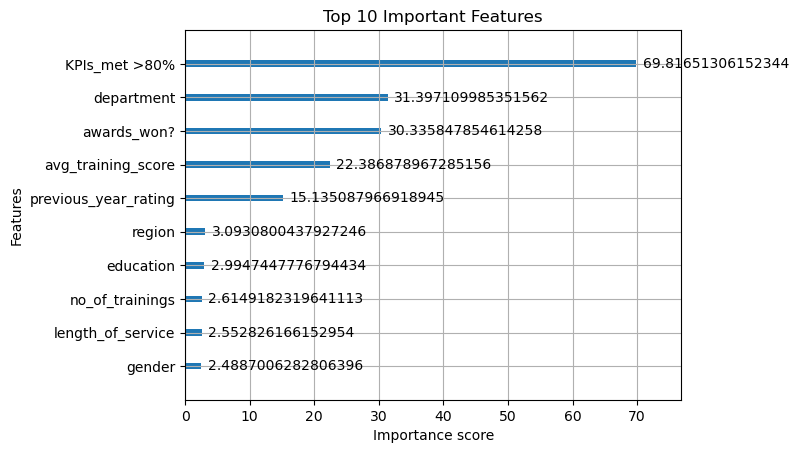


Top 10 Most Important Features:
                 Feature  Importance
9          KPIs_met >80%    0.372827
0             department    0.167663
10           awards_won?    0.161996
11    avg_training_score    0.119548
7   previous_year_rating    0.080823
1                 region    0.016517
2              education    0.015992
5        no_of_trainings    0.013964
8      length_of_service    0.013632
3                 gender    0.013290


In [69]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance
xgb.plot_importance(best_xgb, importance_type='gain', max_num_features=10, title='Top 10 Important Features')
plt.show()
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [68]:
# Make predictions using tuned model
y_pred = best_xgb.predict(X_test)

# Create comparison table
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Add a correctness column
comparison_df['Match'] = comparison_df['Actual'] == comparison_df['Predicted']

# Display first few rows
print("🔍 Sample of Actual vs Predicted Results:\n")
print(comparison_df.head(20))

# Summary statistics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 Accuracy: {accuracy:.4f}")
print("\n📊 Confusion Matrix:\n", cm)
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Sample of Actual vs Predicted Results:

    Actual  Predicted  Match
0        0          0   True
1        0          0   True
2        0          0   True
3        0          0   True
4        0          0   True
5        0          0   True
6        0          0   True
7        0          0   True
8        0          0   True
9        1          0  False
10       0          0   True
11       1          1   True
12       0          0   True
13       0          0   True
14       0          0   True
15       0          0   True
16       0          0   True
17       0          0   True
18       0          0   True
19       0          0   True

🎯 Accuracy: 0.9433

📊 Confusion Matrix:
 [[10011    17]
 [  605   329]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.95      0.35      0.51       934

    accuracy                           0.94     10962
   macro avg       0.95      0.

### Save Model, Encoders, and Scaler

In [96]:
import joblib

# Save tuned XGBoost model
joblib.dump(best_xgb, 'best_xgb_model.pkl')

# --- Save separate encoder for each categorical column ---
label_encoders = {}
for col in columns_object:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- Save model, encoders, and scaler ---
joblib.dump(best_xgb, "best_xgb_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model, encoders, and scaler saved successfully.")

✅ Model, encoders, and scaler saved successfully.
